In [1]:
import numpy as np
import pandas as pd 

import seaborn as sbn 
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [4]:
# Load the dataset
df1= pd.read_csv("MLR_FactoryOverhead.csv")
df1.sample(5)

,Month,Machine Hours,Production Runs,Overhead Cost
14,15,1491,37,102622
9,10,1516,21,88738
22,23,1505,32,94564
7,8,1045,29,76868
5,6,1777,30,107925


In [5]:
df1.describe()

,Month,Machine Hours,Production Runs,Overhead Cost
count,36.000000,36.000000,36.000000,36.000000
mean,18.500000,1456.111111,35.944444,99151.666667
std,10.535654,198.781542,8.674905,10916.811230
min,1.000000,1045.000000,21.000000,75398.000000
25%,9.750000,1361.750000,29.750000,91103.500000
50%,18.500000,1482.500000,34.500000,99695.500000
75%,27.250000,1586.000000,41.000000,107183.000000
max,36.000000,1794.000000,58.000000,117943.000000


In [7]:
df1.isna().count()

Month              36
Machine Hours      36
Production Runs    36
Overhead Cost      36
dtype: int64

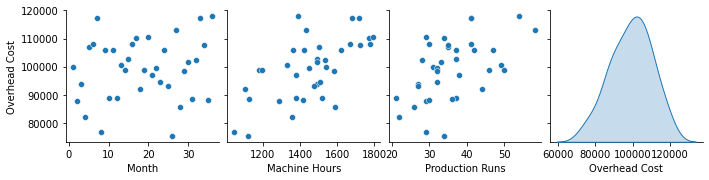

In [10]:
sbn.pairplot(data = df1, 
             y_vars= 'Overhead Cost',
             diag_kind='kde')  

In [16]:
# Training a linear regression model 
Y = df1["Overhead Cost"]
X = df1[['Machine Hours']]
X = sm.add_constant(X) 

# Fit the model on standardized data to get standardized coefficients 
std_reg_model = sm.OLS(Y, X).fit()
print(std_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Overhead Cost   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     22.60
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           3.57e-05
Time:                        15:09:58   Log-Likelihood:                -376.13
No. Observations:                  36   AIC:                             756.3
Df Residuals:                      34   BIC:                             759.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.862e+04   1.07e+04      4.533

/Users/kshyamasagardas/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
# Training a linear regression model 
Y = df1["Overhead Cost"]
X = df1[['Production Runs']]
X = sm.add_constant(X) 

# Fit the model on standardized data to get standardized coefficients 
std_reg_model = sm.OLS(Y, X).fit()
print(std_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Overhead Cost   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     12.64
Date:                Mon, 05 Sep 2022   Prob (F-statistic):            0.00114
Time:                        15:10:14   Log-Likelihood:                -379.62
No. Observations:                  36   AIC:                             763.2
Df Residuals:                      34   BIC:                             766.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.561e+04   6808.611     

/Users/kshyamasagardas/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# Training a linear regression model 
Y = df1["Overhead Cost"]
X = df1[['Machine Hours', 'Production Runs']]
X = sm.add_constant(X) 

# Fit the model on standardized data to get standardized coefficients 
std_reg_model = sm.OLS(Y, X).fit()
print(std_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Overhead Cost   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     107.0
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           3.75e-15
Time:                        15:09:35   Log-Likelihood:                -349.07
No. Observations:                  36   AIC:                             704.1
Df Residuals:                      33   BIC:                             708.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3996.6782   6603.651     

when we increase the value of  𝑘 ,  a regression minimizes the sum of squared errors, by solving

min𝛽∑𝑛𝑖=1𝜀2𝑖=min𝛽∑𝑛𝑖=1(𝑦𝑖−𝑋𝑖𝛽)2 .

The above equation solves for the values of the coefficients such that the squared errors are minimized, or equivalently, for the values of the coefficients such that what you are able to explain, i.e. the  𝑅2 , is maximized.

Therefore, whenever we add a variable to your model, the value of its estimated coefficient can either be zero, in which case the proportion of explained variance ( 𝑅2 ) stays unchanged, or take a nonzero value because it improves the quality of the fit. By construction, your  𝑅2  cannot be smaller after adding a variable.

In [89]:
# Q2. MLR with categorical variables – Courier Service
# Load the dataset
df2= pd.read_csv("MLR_CourierService.csv")
#df2.sample(5)
df2

,Shipment,CargType,CosoShipment
0,1,Semifragile,84.0
1,2,Durable,24.0
2,3,Fragile,165.6
3,4,Fragile,133.2
4,5,Semifragile,120.0
5,6,Fragile,206.4
6,7,Semifragile,138.0
7,8,Semifragile,78.0
8,9,Semifragile,102.0
9,10,Durable,25.2


In [28]:
df2['CargType'].value_counts()

Semifragile    5
Durable        5
Fragile        5
Name: CargType, dtype: int64

In [37]:
df2.groupby('CargType')['CosoShipment'].mean()

CargType
Durable         39.12
Fragile        156.00
Semifragile    104.40
Name: CosoShipment, dtype: float64

Fragile Cargo is Costlier
Durable Cargo is least expensive

In [38]:
df2=df2.drop(columns=['Shipment'])

In [39]:
df2_dummies = pd.get_dummies(df2, columns=['CargType'])
df2_dummies

,CosoShipment,CargType_Durable,CargType_Fragile,CargType_Semifragile
0,84.0,0,0,1
1,24.0,1,0,0
2,165.6,0,1,0
3,133.2,0,1,0
4,120.0,0,0,1
5,206.4,0,1,0
6,138.0,0,0,1
7,78.0,0,0,1
8,102.0,0,0,1
9,25.2,1,0,0


In [41]:
df2_dummies=df2_dummies.drop(columns=['CargType_Semifragile'])
df2_dummies

,CosoShipment,CargType_Durable,CargType_Fragile
0,84.0,0,0
1,24.0,1,0
2,165.6,0,1
3,133.2,0,1
4,120.0,0,0
5,206.4,0,1
6,138.0,0,0
7,78.0,0,0
8,102.0,0,0
9,25.2,1,0


In [42]:
# Training a linear regression model 
Y = df2_dummies["CosoShipment"]
X = df2_dummies[['CargType_Durable', 'CargType_Fragile']]
X = sm.add_constant(X) 

# Fit the model on standardized data to get standardized coefficients 
std_reg_model = sm.OLS(Y, X).fit()
print(std_reg_model.summary()) 

                            OLS Regression Results                            
Dep. Variable:           CosoShipment   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     20.61
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           0.000132
Time:                        17:17:40   Log-Likelihood:                -70.043
No. Observations:                  15   AIC:                             146.1
Df Residuals:                      12   BIC:                             148.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              104.4000     12.903  

/Users/kshyamasagardas/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/kshyamasagardas/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


/Users/kshyamasagardas/opt/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


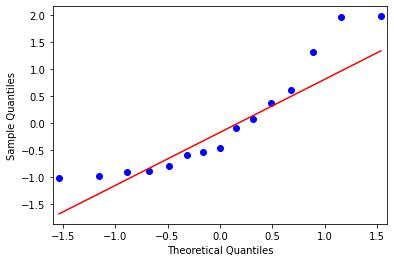

In [43]:
# Q-Q Plot
residuals = std_reg_model.resid 
sm.qqplot(residuals, fit=True, line="q")
plt.show()

In [ ]:
The goodnes of the data fit can be improved with more data and may be adding sufficient parameters for the model.

In [97]:
# MLR with multiple variables – Employee Salary Load the dataset
df3= pd.read_csv("MLR_EmpSalary.csv")
df3.sample(5)

,Employee,Salary,PreviousExp,YearsEmployed,YearsEducation,DirectRepotees,Female,Male,Engineering,Sales,Other
20,21,"$31,528",11,3,13,6,1,0,0,1,0
37,38,"$41,255",4,9,16,4,1,0,1,0,0
45,46,"$26,452",3,1,12,0,0,1,1,0,0
0,1,"$65,487",0,27,22,44,0,1,1,0,0
17,18,"$39,828",6,18,15,5,0,1,0,1,0


In [100]:
df3[df3['Engineering'] == 1].Salary.max()


'$69,246'

In [102]:
df3[df3['Sales'] == 1].Salary.max()



'$41,889'

In [101]:
df3[df3['Other'] == 1].Salary.max()




'$56,326'

In [106]:
df3[df3['Male'] == 1].Salary.apply(lambda x: int(x.replace('$','').replace(',',''))).mean()

37001.72727272727

In [107]:
df3[df3['Female'] == 1].Salary.apply(lambda x: int(x.replace('$','').replace(',',''))).mean()

42417.583333333336

In [108]:
df3[df3['Male'] == 1].Salary.apply(lambda x: int(x.replace('$','').replace(',',''))).max()

65487

In [111]:
df3[df3['Female'] == 1].Salary.apply(lambda x: int(x.replace('$','').replace(',',''))).max()

69246

In [47]:
df3.count()

Employee          46
Salary            46
PreviousExp       46
YearsEmployed     46
YearsEducation    46
DirectRepotees    46
Female            46
Male              46
Engineering       46
Sales             46
Other             46
dtype: int64

In [48]:
df3.isna().value_counts()

Employee  Salary  PreviousExp  YearsEmployed  YearsEducation  DirectRepotees  Female  Male   Engineering  Sales  Other
False     False   False        False          False           False           False   False  False        False  False    46
dtype: int64

In [49]:
df3.corr()

,Employee,PreviousExp,YearsEmployed,YearsEducation,DirectRepotees,Female,Male,Engineering,Sales,Other
Employee,1.000000,0.159932,-0.071766,-0.123902,-0.001458,0.026225,-0.026225,-0.244913,-0.047639,0.302152
PreviousExp,0.159932,1.000000,0.031277,0.080169,0.216198,0.217145,-0.217145,-0.032948,0.156045,-0.102292
YearsEmployed,-0.071766,0.031277,1.000000,0.607486,0.345444,0.209393,-0.209393,0.076349,0.033222,-0.110357
YearsEducation,-0.123902,0.080169,0.607486,1.000000,0.504609,0.192692,-0.192692,0.103040,-0.012239,-0.098717
DirectRepotees,-0.001458,0.216198,0.345444,0.504609,1.000000,0.100337,-0.100337,0.178719,-0.083201,-0.116693
Female,0.026225,0.217145,0.209393,0.192692,0.100337,1.000000,-1.000000,0.003799,0.082572,-0.076690
Male,-0.026225,-0.217145,-0.209393,-0.192692,-0.100337,-1.000000,1.000000,-0.003799,-0.082572,0.076690
Engineering,-0.244913,-0.032948,0.076349,0.103040,0.178719,0.003799,-0.003799,1.000000,-0.483046,-0.637536
Sales,-0.047639,0.156045,0.033222,-0.012239,-0.083201,0.082572,-0.082572,-0.483046,1.000000,-0.366618
Other,0.302152,-0.102292,-0.110357,-0.098717,-0.116693,-0.076690,0.076690,-0.637536,-0.366618,1.000000


In [50]:
df3_salary=df3.drop(["Employee", "Salary","Female", "Other"], axis=1)
df3_salary

,PreviousExp,YearsEmployed,YearsEducation,DirectRepotees,Male,Engineering,Sales
0,0,27,22,44,1,1,0
1,3,20,14,1,0,1,0
2,1,0,17,0,0,0,1
3,5,12,18,0,1,1,0
4,5,7,14,1,1,1,0
5,2,8,12,2,1,1,0
6,1,5,10,2,0,1,0
7,3,15,19,4,1,0,1
8,6,5,11,0,0,0,1
9,2,6,16,3,0,1,0


In [51]:
df3_salary.corr()

,PreviousExp,YearsEmployed,YearsEducation,DirectRepotees,Male,Engineering,Sales
PreviousExp,1.000000,0.031277,0.080169,0.216198,-0.217145,-0.032948,0.156045
YearsEmployed,0.031277,1.000000,0.607486,0.345444,-0.209393,0.076349,0.033222
YearsEducation,0.080169,0.607486,1.000000,0.504609,-0.192692,0.103040,-0.012239
DirectRepotees,0.216198,0.345444,0.504609,1.000000,-0.100337,0.178719,-0.083201
Male,-0.217145,-0.209393,-0.192692,-0.100337,1.000000,-0.003799,-0.082572
Engineering,-0.032948,0.076349,0.103040,0.178719,-0.003799,1.000000,-0.483046
Sales,0.156045,0.033222,-0.012239,-0.083201,-0.082572,-0.483046,1.000000


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(df3_salary.values, i) 
               for i in range(df3_salary.shape[1])], 
               index=df3_salary.columns)

PreviousExp       2.756377
YearsEmployed     4.320725
YearsEducation    9.802773
DirectRepotees    1.620989
Male              1.923437
Engineering       2.401963
Sales             1.704261
dtype: float64

In [54]:
df3_salary.drop("YearsEducation", axis=1, inplace=True)
df3_salary.head()

,PreviousExp,YearsEmployed,DirectRepotees,Male,Engineering,Sales
0,0,27,44,1,1,0
1,3,20,1,0,1,0
2,1,0,0,0,0,1
3,5,12,0,1,1,0
4,5,7,1,1,1,0


In [69]:
df3.Salary

0     $65,487
1     $46,184
2     $32,782
3     $54,899
4     $34,869
5     $35,487
6     $26,548
7     $32,920
8     $29,548
9     $34,231
10    $23,654
11    $39,331
12    $36,512
13    $35,467
14    $68,425
15    $35,468
16    $36,578
17    $39,828
18    $36,487
19    $37,548
20    $31,528
21    $34,632
22    $46,211
23    $29,876
24    $43,674
25    $38,985
26    $53,234
27    $51,698
28    $41,889
29    $38,791
30    $69,246
31    $48,695
32    $34,987
33    $28,985
34    $35,631
35    $54,679
36    $39,743
37    $41,255
38    $36,431
39    $26,578
40    $47,536
41    $36,571
42    $56,326
43    $31,425
44    $24,749
45    $26,452
Name: Salary, dtype: object

In [74]:
# Fit an OLS model
Y = df3["Salary"]
Y=df3["Salary"].apply(lambda x: int(x.replace('$','').replace(',',''))) 
X = sm.add_constant(df3_salary)


/Users/kshyamasagardas/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [75]:

model_sal = sm.OLS(Y, X).fit()
print(model_sal.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     20.11
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           1.50e-10
Time:                        18:21:11   Log-Likelihood:                -460.40
No. Observations:                  46   AIC:                             934.8
Df Residuals:                      39   BIC:                             947.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.087e+04   2499.928     12.

X1,X4,X5 are more than 0.05 hence this can be eliminated. lets eliminate one at a time so that we can analyze the partial effect of all the variables. lets eliminate the heighest p value i.e X1 e.g PreviousExp.

In [80]:
X=df3_salary.drop(['PreviousExp'], axis=1) 
X = sm.add_constant(X)
model_sal2 = sm.OLS(Y, X).fit()
print(model_sal2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     24.65
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           3.01e-11
Time:                        18:24:45   Log-Likelihood:                -460.47
No. Observations:                  46   AIC:                             932.9
Df Residuals:                      40   BIC:                             943.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.044e+04   2151.287     14.

/Users/kshyamasagardas/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
Engineering has a high p-value. We will remove it and retrain the model.

In [81]:
X=X.drop(['Engineering'], axis=1) 
X = sm.add_constant(X)
model_sal3 = sm.OLS(Y, X).fit()
print(model_sal3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     31.12
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           6.20e-12
Time:                        18:24:57   Log-Likelihood:                -460.73
No. Observations:                  46   AIC:                             931.5
Df Residuals:                      41   BIC:                             940.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.113e+04   1868.963     16.

/Users/kshyamasagardas/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
Feature Male can be removed.

In [82]:
X=X.drop(['Male'], axis=1) 
X = sm.add_constant(X)
model_sal4 = sm.OLS(Y, X).fit()
print(model_sal4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     40.10
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           2.15e-12
Time:                        18:28:16   Log-Likelihood:                -461.73
No. Observations:                  46   AIC:                             931.5
Df Residuals:                      42   BIC:                             938.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.962e+04   1513.081     19.

/Users/kshyamasagardas/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [85]:
X.head()

,const,YearsEmployed,DirectRepotees,Sales
0,1.0,27,44,0
1,1.0,20,1,0
2,1.0,0,0,1
3,1.0,12,0,0
4,1.0,7,1,0


In [ ]:
df3.groupby('CargType')['CosoShipment'].mean()

In [ ]:
1) Estimate the appropriate multiple linear regression equation to predict the salary of
an Unitech employee using all explanatory variables.  # Salary=  2.962e+04 + 988.6827(YearsEmployed) + 284.5220(DirectReportees) - 7464.0658 (sales)
2) Do we need to exclude certain columns? Why?  # columns with high VIF and P> 0.05 are excluded to avoid multicolinearity
3) Which department employees are paid the highest? By how much? # The dept Engg is the heighest paid department '$69,246'. Sales  = '$41,889' and other '$56,326'
4) Do you see any discrimination in salaries earned by male and female employees?  # the avg and the max salary is paid to the females are more than that of the male employees, seems strange. coding workout above 
5) What would be the estimated salary of a Data Scientist (joining engineering) with 10
years of work experience. This woman has 18 years of total education, and will be
supervising 4 junior employees. # total educational experince is not relevant as per our finla and last model regression equeation.

In [88]:
x_pred = pd.DataFrame({
    'const' : 1,
    'YearsEmployed' :10,
    'DirectRepotees' : 4,
    'Sales'  : 0 
    }, index=[0])
predicted_sal = model_sal4.predict(x_pred)
predicted_sal

0    40645.167445
dtype: float64

In [ ]:
the predicted salary would be 40645.167445

In [45]:
# Load the dataset
df4= pd.read_csv("MLR_StockPrice.csv")
df4.sample(5)

,Electric Utility,Stock Price,ROE,Dividend
0,1,$23,13.7,2.36
12,13,$28,15.4,2.92
3,4,$24,12.7,2.36
4,5,$20,15.3,1.92
2,3,$20,6.9,2.48
